# Project: House Prices - Advanced Regression Techniques on Kaggle

### Authors: Jinhang Jiang, Maren Olson, Andrew Aviles, Tzu Hsuan Chang

### Date: Oct. 17, 2020

### Master of Science in Business Analytics at Arizona States University 2020 - 2021



# Load Packages

In [1]:
#basic libs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import StratifiedKFold

In [2]:
# all the regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

In [3]:
### data transformation & parameters tuning
#validation & tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Stacking
from vecstack import stacking
from mlxtend.regressor import StackingCVRegressor

# preprocessing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer

# Set Path

In [4]:
print(os.getcwd())
os.chdir('D:/OneDrive/ASU/2020 Fall/CIS 508/TeamAssignment')
print(os.getcwd())

C:\Users\Jinhang Jiang
D:\OneDrive\ASU\2020 Fall\CIS 508\TeamAssignment


# Read Data and Overview

In [33]:
house = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [34]:
print(house.shape)
print(holdout.shape)

(1460, 81)
(1459, 80)


In [35]:
print(house.dtypes.astype(str).value_counts())

object     43
int64      35
float64     3
dtype: int64


In [36]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
nullvalue=house.isnull().sum()
nullvalue.where((nullvalue/1460)>0.8).dropna().astype(int)

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int32

In [8]:
nullvalue=holdout.isnull().sum()
nullvalue.where((nullvalue/1460)>0.8).dropna().astype(int)

Alley          1352
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int32

# Transform the data

#### One-hot-encoding 

In [47]:
combined_data = pd.concat([house, holdout], keys=[0,1])

In [48]:
# drop all the columns with missing values 80% or above
combined_data = combined_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)

In [49]:
# standard scale only numeric variables
num_cols = combined_data.columns[combined_data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [50]:
combined_data["AgeofHouse"]= combined_data["YrSold"] - combined_data["YearRemodAdd"]
print(combined_data[["AgeofHouse","YrSold","YearRemodAdd","SalePrice"]].head())

     AgeofHouse  YrSold  YearRemodAdd  SalePrice
0 0           5    2008          2003   208500.0
  1          31    2007          1976   181500.0
  2           6    2008          2002   223500.0
  3          36    2006          1970   140000.0
  4           8    2008          2000   250000.0


In [107]:
standard = StandardScaler()
combined_data[num_cols] = standard.fit_transform(combined_data[num_cols])
combined_data["SalePrice"]=house["SalePrice"]

In [51]:
combined_data = combined_data.drop(["YrSold","YearRemodAdd","YearBuilt"],axis=1)

In [52]:
td=pd.get_dummies(combined_data)

In [53]:
print(td.shape)

(2919, 275)


In [54]:
td["SalePrice"].head()

0  0    208500.0
   1    181500.0
   2    223500.0
   3    140000.0
   4    250000.0
Name: SalePrice, dtype: float64

In [55]:
nullvalue=td.isnull().sum()
nullvalue.where(nullvalue>0).dropna().astype(int)

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
GarageArea         1
GarageCars         1
GarageYrBlt      159
LotFrontage      486
MasVnrArea        23
SalePrice       1459
TotalBsmtSF        1
dtype: int32

In [56]:
td = td.fillna(td.mean())

In [57]:
nullvalue=td.isnull().sum()
nullvalue.isna().any()

False

In [58]:
# unpack the conbined data
train = td.xs(0)
test = td.xs(1).drop(['SalePrice'],axis=1)

In [59]:
train["SalePrice"]=np.log(house["SalePrice"])
train["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [60]:
print(train.shape)
print(test.shape)

(1460, 275)
(1459, 274)


In [132]:
#train.to_csv('train_dummy1.csv',index=False)
#test.to_csv('test_dummy1.csv',index=False)

# Plot Variables

#### Top 10 correlated

In [133]:
correlation = np.abs(train.corr(method='pearson'))
columns = correlation.nlargest(15, 'SalePrice').sort_values(by=["SalePrice"],ascending=False)

columns = columns["SalePrice"].index
columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'AgeofHouse',
       'KitchenQual_TA', 'TotRmsAbvGrd', 'Foundation_PConc', 'ExterQual_Gd',
       'GarageYrBlt'],
      dtype='object')

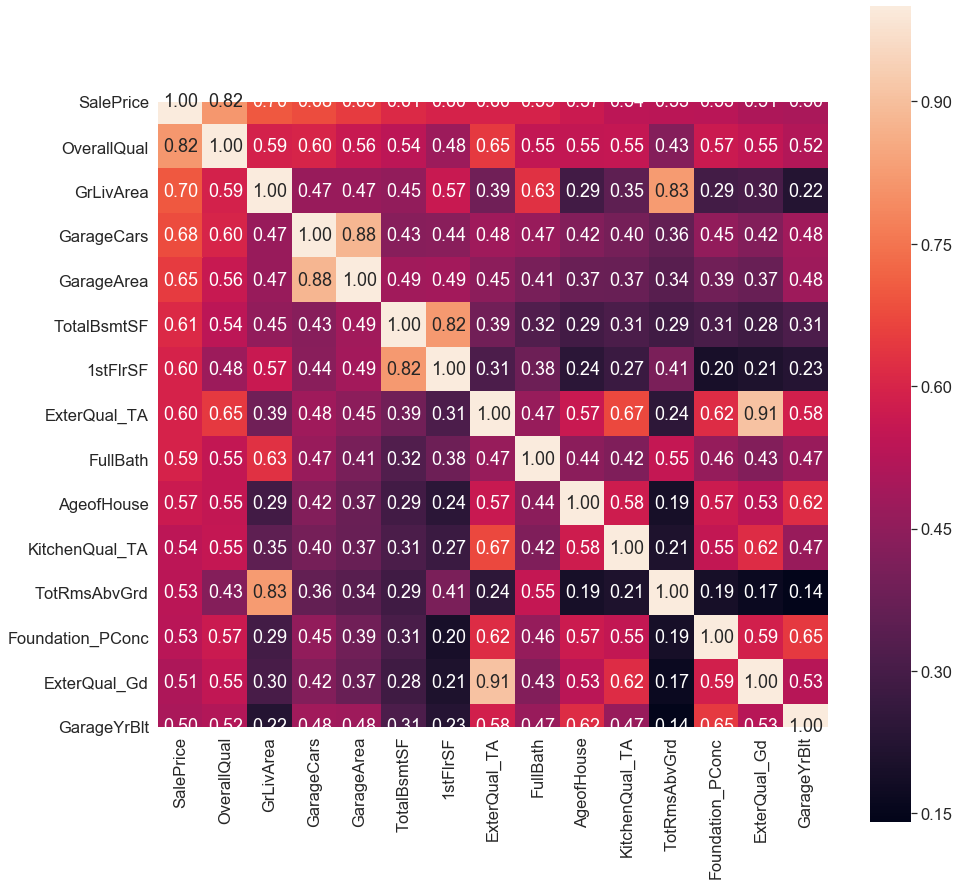

In [134]:
correlation_map = np.abs(np.corrcoef(train[columns].values.T))
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(correlation_map, 
                      cbar=True, 
                      annot=True, 
                      square=True, 
                      fmt='.2f', 
                      yticklabels=columns.values, 
                      xticklabels=columns.values) 
plt.show()

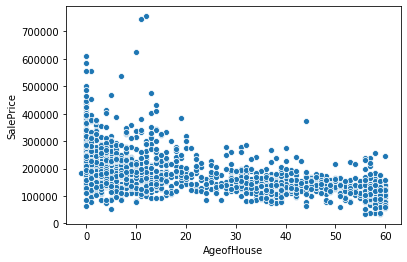

In [29]:
sns.scatterplot(train["AgeofHouse"],train["SalePrice"],ci=99)

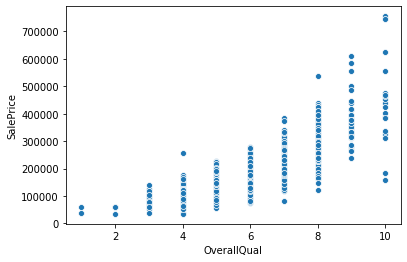

In [30]:
sns.scatterplot(train["OverallQual"],train["SalePrice"], ci=99)

# Fit models，Tuning，and Diagnosis check

#### Split data 

In [285]:
#top 79 variable by correlation
#correlation = train.corr(method='pearson').abs()
#columns_80 = correlation.nlargest(80, 'SalePrice').index
columns_79=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'AgeofHouse',
       'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'MasVnrArea',
       'GarageYrBlt', 'Fireplaces', 'ExterQual_Gd', 'BsmtQual_TA',
       'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'GarageFinish_Unf', 'Neighborhood_NridgHt', 'BsmtFinSF1',
       'MasVnrType_None', 'SaleType_New', 'GarageType_Detchd',
       'SaleCondition_Partial', 'Foundation_CBlock', 'FireplaceQu_Gd',
       'GarageType_Attchd', 'LotFrontage', 'MasVnrType_Stone',
       'Neighborhood_NoRidge', 'WoodDeckSF', 'KitchenQual_Gd', '2ndFlrSF',
       'OpenPorchSF', 'HeatingQC_TA', 'BsmtExposure_Gd', 'Exterior2nd_VinylSd',
       'Exterior1st_VinylSd', 'MSZoning_RM', 'HalfBath', 'GarageCond_TA',
       'LotShape_Reg', 'LotArea', 'BsmtExposure_No', 'FireplaceQu_Ex',
       'CentralAir_Y', 'CentralAir_N', 'GarageQual_TA', 'MSZoning_RL',
       'HouseStyle_2Story', 'SaleType_WD', 'Electrical_SBrkr', 'RoofStyle_Hip',
       'GarageType_BuiltIn', 'BsmtQual_Gd', 'PavedDrive_Y', 'BsmtFullBath',
       'RoofStyle_Gable', 'LotShape_IR1', 'Neighborhood_StoneBr', 'BsmtUnfSF',
       'PavedDrive_N', 'Foundation_BrkTil', 'MasVnrType_BrkFace',
       'Electrical_FuseA', 'Neighborhood_OldTown', 'Neighborhood_NAmes',
       'Neighborhood_Edwards', 'GarageFinish_RFn', 'RoofMatl_WdShngl',
       'BedroomAbvGr']

In [286]:
#label = train["SalePrice"]
#data = train[columns_79].fillna(house.mean())

In [365]:
#train=pd.read_csv('train_dummy.csv')
#test=pd.read_csv('test_dummy.csv')

In [63]:
label = train["SalePrice"]
data = train.drop(["Id","SalePrice"],axis=1).fillna(train.mean())

In [73]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0.0,0.0,0.0,0.0,953.0,0,...,0,0,0,0,0,1,0,1,1,0
1456,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,0,...,0,0,0,0,0,1,0,1,1,0
1457,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,0,...,0,0,0,0,0,1,0,1,1,0
1458,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,112,...,0,0,0,0,0,1,0,1,1,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split (data, label,
                                                     test_size = 0.2,
                                                    random_state = 42)

In [42]:
X_train, y_train = data, label

#### statsmodels 

In [81]:
#original 
# generate OLS model
sm_model = sm.OLS(y_train, sm.add_constant(X_train))
sm_model_fit = sm_model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

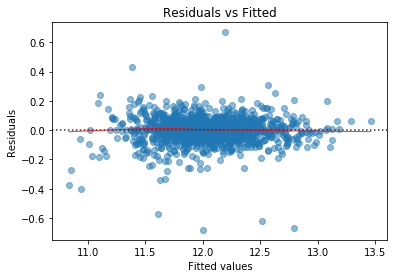

In [74]:
# model values
model_fitted_y = sm_model_fit.fittedvalues
# model residuals
model_residuals = sm_model_fit.resid
# normalized residuals
model_norm_residuals = sm_model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = sm_model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = sm_model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

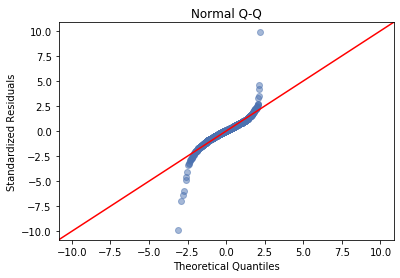

In [75]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

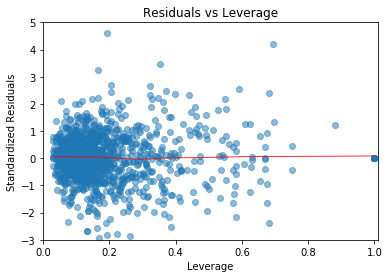

In [76]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');
  
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

In [77]:
print(sm_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     65.64
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:15:09   Log-Likelihood:                 1111.4
No. Observations:                1168   AIC:                            -1753.
Df Residuals:                     933   BIC:                            -563.1
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.50

In [88]:
sm_prediction=sm_model_fit.predict(sm.add_constant(test.drop(["Id"],axis=1)))

In [89]:
sm_prediction

0       11.728774
1       11.991745
2       12.122877
3       12.195325
4       12.206700
          ...    
1454    11.283007
1455    11.425600
1456    12.078040
1457    11.653754
1458    12.290807
Length: 1459, dtype: float64

In [90]:
sm_DATA = pd.DataFrame({"ID":holdout["Id"],"SalePrice":np.exp(sm_prediction)})
sm_DATA.head()

,ID,SalePrice
0,1461,124091.476956
1,1462,161416.857428
2,1463,184034.226946
3,1464,197861.995501
4,1465,200125.507353


In [91]:
sm_DATA.to_csv("sm.csv",index=False)

####  XGBRegressor

In [91]:
xgb = XGBRegressor()

In [412]:
model = xgb.fit(X_train, y_train)

In [413]:
y_pred = model.predict(X_test)

In [415]:
print(mean_squared_error(y_test,y_pred))

0.024557546111597647


In [95]:
### Tuning
cv=KFold(n_splits = 5, random_state=2020)

In [147]:
xgb_param = { 'objective':['reg:linear'],
              'learning_rate': [0.01,.03, 0.05], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [2,4,6],
              'subsample': [0.7,0.8,0.3],
              'colsample_bytree': [0.7,0.3],
              'n_estimators': [1300,2000,3000]}

In [148]:
xgb_grid = GridSearchCV(xgb,
                        xgb_param,
                        cv = cv,
                        n_jobs = 5,
                        verbose=True)

In [149]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  8.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 25.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 46.7min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 76.7min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 113.8min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 150.1min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 192.6min
[Parallel(n_jobs=5)]: Done 3240 out of 3240 | elapsed: 196.4min finished


[22:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mo...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'co

In [150]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9170237077670726
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 1300, 'objective': 'reg:linear', 'subsample': 0.8}


In [151]:
xgb_best_params={'colsample_bytree': 0.7, 
                 'learning_rate': 0.03,
                 'max_depth': 3, 
                 'min_child_weight': 2, 
                 'n_estimators': 1300, 
#                 'nthread': 4, 
                 'objective': 'reg:linear', 
#                 'silent': 1, 
                 'subsample': 0.8}

In [152]:
xgb_best_model = XGBRegressor(**xgb_best_params,tree_method='gpu_hist')

In [153]:
xgb_best_model.fit(X_train,y_train,
#                   eval_set=[(X_train, y_train), (X_test, y_test)],
                   eval_metric='rmse',
                   verbose=True
                  )

[22:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
             n_estimators=1300, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='gpu_hist',
             validate_parameters=1, verbosity=None)

In [521]:
xgb_pred=xgb_best_model.predict(X_test)


print(mean_squared_error(y_test,xgb_pred))

0.01794909914394914


In [154]:
xgb_prediction = xgb_best_model.predict(test)
xgb_DATA = pd.DataFrame({"ID":holdout["Id"],"SalePrice":np.exp(xgb_prediction)})
xgb_DATA.head()

,ID,SalePrice
0,1461,120392.445312
1,1462,160303.812500
2,1463,180038.406250
3,1464,180824.078125
4,1465,172652.843750


In [155]:
xgb_DATA.to_csv("xgb_regressor11.csv",index=False)

#### SGDRegressor

In [503]:
# SGD gives us super wierd value, so we have to do some transformation of the whole dataset
standard = StandardScaler()
data1=standard.fit_transform(data)

In [504]:
X_train1, X_test1, y_train, y_test = train_test_split (data1, label,
                                                     test_size = 0.2,
                                                    random_state = 42)

In [481]:
sgd = SGDRegressor()

In [482]:
sgd_param = {"loss":["squared_loss","huber", "epsilon_insensitive","squared_epsilon_insensitive"],
            "penalty":['l1',"l2"],
            "learning_rate":["adaptive","invscaling","optimal"],
            "average":[True,False],
             "l1_ratio":[0.05,0.1,0.15,0.2]
            }

In [483]:
sgd_grid = GridSearchCV(sgd,
                        sgd_param,
                        cv = cv,
                        n_jobs = 5,
                        verbose=True)

In [505]:
sgd_grid.fit(X_train1,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.1s
[Parallel(n_jobs=5)]: Done 324 tasks      | elapsed:   20.6s
[Parallel(n_jobs=5)]: Done 872 tasks      | elapsed:   46.8s
[Parallel(n_jobs=5)]: Done 960 out of 960 | elapsed:   49.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=SGDRegressor(), n_jobs=5,
             param_grid={'average': [True, False],
                         'l1_ratio': [0.05, 0.1, 0.15, 0.2],
                         'learning_rate': ['adaptive', 'invscaling', 'optimal'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l1', 'l2']},
             verbose=True)

In [506]:
print(sgd_grid.best_score_)
print(sgd_grid.best_params_)

-3.988928802491153
{'average': False, 'l1_ratio': 0.1, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'l1'}


In [488]:
sgd_best_params={'average': False, 'l1_ratio': 0.1, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'l1'}

In [489]:
sgd_best_model = SGDRegressor(**sgd_best_params)

In [508]:
sgd_best_model.fit(X_train1,y_train)

SGDRegressor(l1_ratio=0.1, learning_rate='optimal', loss='huber', penalty='l1')

In [509]:
sgd_pred=sgd_best_model.predict(X_test1)


print(mean_squared_error(y_test,sgd_pred))

0.45458349035606394


In [510]:
test1=standard.fit_transform(test.drop(["Id"],axis=1))

In [511]:
sgd_prediction = sgd_best_model.predict(test1)
sgd_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(sgd_prediction)})
sgd_DATA.head()

,ID,SalePrice
0,1461,117928.852709
1,1462,164215.072130
2,1463,162123.230425
3,1464,161705.959493
4,1465,646652.079468


In [512]:
sgd_DATA.to_csv("sgd_regressor2.csv",index=False)

#### MLPRegressor

In [525]:
mlp=MLPRegressor(max_iter=200)

In [526]:
mlp_param = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [529]:
mlp_grid = GridSearchCV(mlp,
                        mlp_param,
                        cv = cv,
                        n_jobs = 3,
                        verbose=True)

In [531]:
mlp_grid.fit(X_train1,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   47.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 240 out of 240 | elapsed:  5.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=MLPRegressor(), n_jobs=3,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=True)

In [532]:
print(mlp_grid.best_score_)
print(mlp_grid.best_params_)

0.0511157584189615
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [533]:
mlp_best_params={'activation': 'tanh',
                 'alpha': 0.0001, 
                 'hidden_layer_sizes': (50, 100, 50),
                 'learning_rate': 'constant', 
                 'solver': 'sgd'}

In [534]:
mlp_best_model=MLPRegressor(**mlp_best_params)

In [555]:
mlp_best_model.fit(X_train1,y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), solver='sgd')

In [556]:
mlp_pred=mlp_best_model.predict(X_test1)


print(mean_squared_error(y_test,mlp_pred))

0.08682618465345503


In [557]:
#test.drop(["Id"],axis=1)
mlp_prediction = mlp_best_model.predict(test1)
mlp_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(mlp_prediction)})
mlp_DATA.head()

,ID,SalePrice
0,1461,106603.498824
1,1462,115823.619146
2,1463,207908.178877
3,1464,211688.654332
4,1465,165892.371563


In [558]:
mlp_DATA.to_csv("mlpstandard.csv",index=False)

#### Decision Tree 

In [559]:
dt=DecisionTreeRegressor()

In [579]:
criterion = ['mse','mae','friedman_mse']
splitter = ['best']
max_depth = [6,8,10,13]
min_samples_split = [30,33,35,37,39]
min_samples_leaf = [9,13,15,17]

max
#cross validation
dt_params = {'criterion': criterion,
        'splitter': splitter,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
       }

In [580]:
dt_grid = GridSearchCV(dt, dt_params,cv=cv, n_jobs=3,verbose=True)

In [581]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 120 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done 568 tasks      | elapsed:   20.5s
[Parallel(n_jobs=3)]: Done 821 tasks      | elapsed:   40.3s
[Parallel(n_jobs=3)]: Done 1200 out of 1200 | elapsed:   44.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=DecisionTreeRegressor(), n_jobs=3,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [6, 8, 10, 13],
                         'min_samples_leaf': [9, 13, 15, 17],
                         'min_samples_split': [30, 33, 35, 37, 39],
                         'splitter': ['best']},
             verbose=True)

In [606]:
print(dt_grid.best_params_)

{'criterion': 'mse', 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 30, 'splitter': 'best'}


In [607]:
dt_best_params={'criterion': 'mse', 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 30, 'splitter': 'best'}

In [612]:
dt_best_model=DecisionTreeRegressor(**dt_best_params)

In [613]:
dt_best_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=13, min_samples_split=30)

In [614]:
dt_pred=dt_best_model.predict(X_test)
print(mean_squared_error(y_test,dt_pred))

0.03682007939252485


In [615]:
dt_prediction=dt_best_model.predict(test.drop(["Id"],axis=1))
dt_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(dt_prediction)})
dt_DATA.head()

,ID,SalePrice
0,1461,134147.548966
1,1462,141774.712588
2,1463,167677.135798
3,1464,168149.679258
4,1465,193160.120840


In [592]:
dt_DATA.to_csv("dtregressor.csv",index=False)

#### RandomForestRegressor

In [593]:
rdr=RandomForestRegressor()

In [603]:
# Number of trees in random forest
n_estimators = [100,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 50, num = 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion = ['mse','mae']
# Create the random grid
rdr_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

In [604]:
rdr_grid = GridSearchCV(rdr, rdr_params,cv=cv, n_jobs=-1,verbose=True)

In [605]:
rdr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 136.5min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 142.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 153.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 246.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 401.1min
[Parallel(n_jobs=-1)]: Done 10000 out of 

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [2, 14, 26, 38, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 14, 26, 38, 50],
                         'min_samples_split': [2, 14, 26, 38, 50],
                         'n_estimators': [100, 500]},
             verbose=True)

In [616]:
print(rdr_grid.best_params_)

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 38, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [638]:
rdr_best_params={'bootstrap': False, 
                 'criterion': 'mse', 
                 'max_depth': 38, 
                 'max_features': 'sqrt', 
                 'min_samples_leaf': 2, 
                 'min_samples_split': 2, 
                 'n_estimators': 1000}

In [639]:
rdr_best_model=RandomForestRegressor(**rdr_best_params)

In [640]:
rdr_best_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=38, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=1000)

In [641]:
rdr_pred=rdr_best_model.predict(X_test)
print(mean_squared_error(y_test,rdr_pred))

0.02468050843433112


In [642]:
rdr_prediction=rdr_best_model.predict(test.drop(["Id"],axis=1))
rdr_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(rdr_prediction)})
rdr_DATA.head()

,ID,SalePrice
0,1461,123935.210335
1,1462,151565.423184
2,1463,182647.432118
3,1464,190596.601881
4,1465,197232.594484


In [643]:
rdr_DATA.to_csv("rdrregressor3.csv",index=False)

#### SVR

In [692]:
svr = SVR()

In [ ]:
parameters={'cache_size': range(100,200,10),'degree':range(1,10,2),'kernel':['linear']}
svr_grid = GridSearchCV(svr,parameters,cv=3, n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)
#grid_parm=svr_random.best_params_print(svr_predict_Test)
print(svr_random.best_parmas_)

In [703]:
svr_best_params={'cache_size':110,'degree':3,'kernel':'linear'}
svr_best_model=SVR(**svr_best_params)
svr_best_model.fit(X_train1,y_train)

SVR(cache_size=110, kernel='linear')

In [704]:
svr_pred=svr_best_model.predict(test1)

In [705]:
svr_pred

array([11.77316633, 11.95321119, 12.15007822, ..., 12.13288317,
       11.68715218, 12.30549477])

In [706]:
svr_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(svr_pred)})
print(svr_DATA.head())
svr_DATA.to_csv("svr.csv",index=False)

     ID      SalePrice
0  1461  129724.250813
1  1462  155315.093197
2  1463  189108.881514
3  1464  198682.251301
4  1465  197319.159645


#### Catboost Regressor

In [108]:
cat=CatBoostRegressor()
cat.fit(X_train,y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.04175
0:	learn: 0.3876701	total: 12.4ms	remaining: 12.4s
1:	learn: 0.3770224	total: 18.5ms	remaining: 9.25s
2:	learn: 0.3664734	total: 24.8ms	remaining: 8.23s
3:	learn: 0.3570465	total: 31.9ms	remaining: 7.94s
4:	learn: 0.3473457	total: 39.1ms	remaining: 7.78s
5:	learn: 0.3379859	total: 46.4ms	remaining: 7.69s
6:	learn: 0.3292662	total: 52.8ms	remaining: 7.48s
7:	learn: 0.3207399	total: 59.1ms	remaining: 7.33s
8:	learn: 0.3121018	total: 66.2ms	remaining: 7.29s
9:	learn: 0.3041397	total: 72.9ms	remaining: 7.21s
10:	learn: 0.2970969	total: 78.6ms	remaining: 7.07s
11:	learn: 0.2901229	total: 84.5ms	remaining: 6.96s
12:	learn: 0.2832709	total: 90.3ms	remaining: 6.86s
13:	learn: 0.2766311	total: 96.6ms	remaining: 6.8s
14:	learn: 0.2702628	total: 103ms	remaining: 6.74s
15:	learn: 0.2637942	total: 108ms	remaining: 6.65s
16:	learn: 0.2583607	total: 114ms	remaining: 6.58s
17:	learn: 0.2529595	total: 119ms	remaining: 6.51s
18:	learn: 0.2474280	total: 125ms	remaining: 6.45s

In [110]:
#Base model - Prediction
cat_prediction=cat.predict(test)
cat_DATA = pd.DataFrame({"ID":holdout["Id"],"SalePrice":np.exp(cat_prediction)})
print(cat_DATA.head())
cat_DATA.to_csv("cat9.csv",index=False)

     ID      SalePrice
0  1461  119229.117194
1  1462  163924.658264
2  1463  187254.013619
3  1464  195871.969510
4  1465  183441.244376


In [112]:
cat_grid_params={'bagging_temperature': [0,0.3],
                 'border_count': [1,10,50,100],
                 'depth': [2,4,6],
                 'iterations': [1000,1200,1500],
                 'learning_rate': [0.01,0.05,0.1]}

In [113]:
cat=CatBoostRegressor()
cat_grid_result = cat.grid_search(cat_grid_params, X=X_train,y=y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.1454419314
bestIteration = 997

0:	loss: 0.1454419	best: 0.1454419 (0)	total: 1.31s	remaining: 4m 41s

bestTest = 0.1395988999
bestIteration = 938

1:	loss: 0.1395989	best: 0.1395989 (1)	total: 2.62s	remaining: 4m 40s

bestTest = 0.1449983911
bestIteration = 672

2:	loss: 0.1449984	best: 0.1395989 (1)	total: 3.79s	remaining: 4m 29s

bestTest = 0.1420760305
bestIteration = 1197

3:	loss: 0.1420760	best: 0.1395989 (1)	total: 4.99s	remaining: 4m 24s

bestTest = 0.1395258661
bestIteration = 1081

4:	loss: 0.1395259	best: 0.1395259 (4)	total: 6.18s	remaining: 4m 20s

bestTest = 0.1449983911
bestIteration = 672

5:	loss: 0.1449984	best: 0.1395259 (4)	total: 7.37s	remaining: 4m 17s

bestTest = 0.1383922912
bestIteration = 1499

6:	loss: 0.1383923	best: 0.1383923 (6)	total: 9.26s	remaining: 4m 36s

bestTest = 0.1395258661
bestIteration = 1081

7:	loss: 0.1395259	best: 0.1383923 (6)	total: 10.9s	remaining: 4m 43s

bestTest = 0.1449983911
bestIteration = 672

8:	loss: 0.1449984	bes

In [114]:
print(cat_grid_result)

{'params': {'border_count': 50, 'bagging_temperature': 0, 'depth': 2, 'iterations': 1000, 'learning_rate': 0.05}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

In [115]:
cat_best_params={
    'bagging_temperature': 0,
    'border_count': 50,
    'depth': 2,
    'iterations': 1000,
    'learning_rate': 0.05
            }

In [116]:
cat_best_model = CatBoostRegressor(**cat_best_params,task_type = "GPU",early_stopping_rounds=20)
cat_best_model.fit(X_train,y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3876736	total: 12.1ms	remaining: 12.1s
1:	learn: 0.3766775	total: 22.9ms	remaining: 11.4s
2:	learn: 0.3664434	total: 33.8ms	remaining: 11.2s
3:	learn: 0.3567877	total: 44.2ms	remaining: 11s
4:	learn: 0.3475804	total: 55.8ms	remaining: 11.1s
5:	learn: 0.3393082	total: 66.3ms	remaining: 11s
6:	learn: 0.3312811	total: 76.6ms	remaining: 10.9s
7:	learn: 0.3236502	total: 87.7ms	remaining: 10.9s
8:	learn: 0.3164262	total: 98.6ms	remaining: 10.9s
9:	learn: 0.3091150	total: 109ms	remaining: 10.8s
10:	learn: 0.3028003	total: 119ms	remaining: 10.7s
11:	learn: 0.2962515	total: 129ms	remaining: 10.6s
12:	learn: 0.2901684	total: 140ms	remaining: 10.7s
13:	learn: 0.2844282	total: 151ms	remaining: 10.6s
14:	learn: 0.2785477	total: 162ms	remaining: 10.6s
15:	learn: 0.2733137	total: 172ms	remaining: 10.6s
16:	learn: 0.2684964	total: 182ms	remaining: 10.5s
17:	learn: 0.2633462	total: 192ms	remaining: 10.5s
18:	learn: 0.2585179	total: 204ms	remaining: 10.5s
19:	learn: 0.2540193	total: 216ms	re

In [118]:
cat_prediction=cat_best_model.predict(test)


In [119]:
cat_DATA = pd.DataFrame({"ID":holdout["Id"],"SalePrice":np.exp(cat_prediction)})
print(cat_DATA.head())
cat_DATA.to_csv("cat10.csv",index=False)

     ID      SalePrice
0  1461  111302.257559
1  1462  165148.222086
2  1463  178981.921808
3  1464  190765.222287
4  1465  192037.941917


#### LightGBM

In [372]:
# set params
params = {'objective': 'gamma',
          'metric': 'rmse',
#          'num_class': 1,
          'is_unbalance': True,
          'boosting_type': 'gbdt',
          'learning_rate': 0.01,
          'max_depth':20,
#          'num_leaves': 84,
#          'feature_fraction':  0.7134122385103637,
 #        'lambda_l1': 516,
#          'lambda_l2': 212,
#          'max_bin':812,
#          'subsample': 0.24603962741181312,
          'num_iterations':15000,
#          'min_data_in_leaf':79,
          'tree_learner':'serial'
         }

In [373]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

In [374]:
lgb1 = lgb.train(params, 
                  train_data, 
#                  num_boost_round = 1000,
                  valid_sets=[train_data, valid_data], 
                  early_stopping_rounds=200 )

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3258
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 181
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.487458
[1]	training's rmse: 0.387228	valid_1's rmse: 0.430018
Training until validation scores don't improve for 200 rounds
[2]	training's rmse: 0.384046	valid_1's rmse: 0.426795
[3]	training's rm

In [376]:
names=X_train.columns
lgb_pred = lgb1.predict(test[names])

In [378]:
lgb_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(lgb_pred)})
print(lgb_DATA.head())


     ID      SalePrice
0  1461  124638.445004
1  1462  155500.444705
2  1463  184243.636455
3  1464  178248.449213
4  1465  193055.825040


In [379]:
lgb_DATA.to_csv("lgb1.csv",index=False)

# Stacking Models

In [662]:
models = [
    RandomForestRegressor(bootstrap= False, 
                 criterion='mse', 
                 max_depth= 38, 
                 max_features='sqrt', 
                 min_samples_leaf=2, 
                 min_samples_split=2, 
                 n_estimators= 1000),
    
    DecisionTreeRegressor(criterion='mse', 
                          max_depth=13, 
                          min_samples_leaf= 13, 
                          min_samples_split= 30, 
                          splitter= 'best'),
    
#    MLPRegressor(activation= 'tanh',
#                 alpha=0.0001, 
#                 hidden_layer_sizes=(50, 100, 50),
#                 learning_rate= 'constant', 
#                 solver= 'sgd'),
    
    XGBRegressor(colsample_bytree=0.7, 
                 learning_rate= 0.03,
                 max_depth=4, 
                 min_child_weight= 4, 
                 n_estimators=1300, 
                 nthread= 4, 
                 objective= 'reg:linear', 
                 silent=1, 
                 subsample= 0.7,
                 tree_method='gpu_hist')
]

In [663]:
S_train, S_test = stacking(models,                   
                           data, label, test.drop(["Id"],axis=1),   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=mean_squared_error, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]
    fold  0:  [0.01946940]
    fold  1:  [0.01545666]
    fold  2:  [0.03312323]
    fold  3:  [0.01857182]
    fold  4:  [0.01673297]
    ----
    MEAN:     [0.02067082] + [0.00638131]
    FULL:     [0.02067082]

model  1:     [DecisionTreeRegressor]
    fold  0:  [0.03397764]
    fold  1:  [0.03298931]
    fold  2:  [0.04459972]
    fold  3:  [0.03346452]
    fold  4:  [0.03252941]
    ----
    MEAN:     [0.03551212] + [0.00456931]
    FULL:     [0.03551212]

model  2:     [XGBRegressor]
[22:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to s

#### stacking with the model in the first layer

In [664]:
stacking_model=XGBRegressor(colsample_bytree=0.7, 
                 learning_rate= 0.03,
                 max_depth=4, 
                 min_child_weight= 4, 
                 n_estimators=1300, 
                 nthread= 4, 
                 objective= 'reg:linear', 
                 silent=1, 
                 subsample= 0.7,
                 tree_method='gpu_hist')
stacking_model.fit(S_train,label)

[22:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints='(0,0,0)',
             n_estimators=1300, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

#### stakcing_model with new regressor 

In [669]:
stacking_model=GradientBoostingRegressor()

GradientBoostingRegressor()

In [673]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 3)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 50, num = 3)]
# Criterion
criterion = ['mse','mae','friedman_mse']
# Create the random grid
stakcing_params = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion}

In [676]:
stacking_grid = GridSearchCV(stacking_model, stakcing_params,cv=cv, n_jobs=-1,verbose=True)

In [677]:
stacking_grid.fit(S_train,label)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  3.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=False),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [2, 14, 26, 38, 50],
                         'min_samples_leaf': [2, 26, 50],
                         'min_samples_split': [2, 26, 50]},
             verbose=True)

In [678]:
print(stacking_grid.best_params_)

{'criterion': 'mae', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [679]:
stacking_best_params={'criterion': 'mae', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [680]:
stacking_model=GradientBoostingRegressor(**stacking_best_params)

In [681]:
stacking_model.fit(S_train,label)

GradientBoostingRegressor(criterion='mae', max_depth=2, min_samples_leaf=2)

In [682]:
stacking_prediction=stacking_model.predict(S_test)

In [683]:
stacking_DATA = pd.DataFrame({"ID":test["Id"],"SalePrice":np.exp(stacking_prediction)})
stacking_DATA.head()

,ID,SalePrice
0,1461,126458.963326
1,1462,161341.302407
2,1463,187398.503172
3,1464,192598.884133
4,1465,181948.623489


In [684]:
stacking_DATA.to_csv("stacking4.csv",index=False)

# Stacking with StackingCVRegressor

In [120]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
lasso = Lasso(alpha = 0.0005)
ridge = Ridge(alpha = 11.9)
elasticnet = ElasticNet(alpha = 0.001)
gbr = GradientBoostingRegressor(learning_rate = 0.1, loss = 'huber', max_depth = 1, max_features ='sqrt',
                                min_samples_leaf = 15, min_samples_split = 10, n_estimators =3000)
lightgbm = LGBMRegressor(learning_rate = 0.01, n_estimators = 5000, num_leaves = 4)
xgboost = XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 3500)
scvr = StackingCVRegressor(regressors=(rdr_best_model, lasso, elasticnet, gbr, xgboost, lightgbm),
                           meta_regressor=xgboost,
                           use_features_in_secondary=True)

In [132]:
stdSc=StandardScaler()
num_features = X_train.select_dtypes(exclude = ["object"]).columns

X_train.loc[:, num_features] = stdSc.fit_transform(X_train.loc[:, num_features])
scvr.fit(np.array(X_train),np.array(y_train))

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=0.01,
                                                max_delta_step=None,
                                                max_depth=3,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=3500, n_...
      

In [135]:
scvr_pred=scvr.predict(np.array(test.fillna(test.mean())))

In [137]:
scvr_DATA = pd.DataFrame({"ID":holdout["Id"],"SalePrice":np.exp(scvr_pred)})
scvr_DATA.head()

,ID,SalePrice
0,1461,128010.148438
1,1462,160763.093750
2,1463,189990.406250
3,1464,205336.171875
4,1465,186763.609375


In [139]:
scvr_DATA.to_csv("scvr1.csv",index=False)

# Average 

#### average ensemble

In [688]:
Average=pd.DataFrame({"ID":test["Id"],"SalePrice":(np.exp(dt_prediction)+
                                                   np.exp(mlp_prediction)+
                                                   np.exp(rdr_prediction)+
                                                   np.exp(xgb_prediction))/4})
Average

,ID,SalePrice
0,1461,123056.722734
1,1462,142497.813729
2,1463,186566.444511
3,1464,190947.897930
4,1465,186010.810784
...,...,...
1454,2915,86293.440743
1455,2916,85348.386581
1456,2917,164322.386546
1457,2918,129475.698070


In [689]:
Average.to_csv("average1.csv", index=False)

#### weighted average ensemble

In [690]:
WeightedAverage=pd.DataFrame({"ID":test["Id"],"SalePrice":(0.2*np.exp(dt_prediction)+
                                                   0.1*np.exp(mlp_prediction)+
                                                   0.3*np.exp(rdr_prediction)+
                                                   0.4*np.exp(xgb_prediction))})
WeightedAverage

,ID,SalePrice
0,1461,125686.676682
1,1462,149737.931387
2,1463,184333.685620
3,1464,189320.445912
4,1465,189494.305294
...,...,...
1454,2915,85935.875363
1455,2916,86572.695459
1456,2917,160486.926951
1457,2918,122972.780341


In [691]:
WeightedAverage.to_csv("WeightedAverage.csv",index=False)